# Import Libraries :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Read data from Kaggale :

In [ ]:
file_path = "netflix_titles.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/netflix-shows",
  file_path
)

/tmp/ipython-input-21-1885117836.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preprocessing :

1. show the data types of each column :

In [ ]:

df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


2. check the duplicated values :

In [ ]:
print(df.duplicated().sum())

0


3. check missing values in each column :

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


4. Remove any extra whitespaces in string columns :

In [ ]:
df = df.applymap(lambda x : x.strip() if isinstance(x , str) else x)

/tmp/ipython-input-26-2858456343.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x : x.strip() if isinstance(x , str) else x)


5.  split actors in cast column to list :

In [ ]:
df['cast']  = df['cast'].apply(lambda x : x.split(', ') if pd.notna(x) else [])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


6. convert the data type of date_added to dateTime :

In [ ]:
df['date_added'] =  pd.to_datetime(df['date_added'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


7. Pre process duration column and sperate it to duration_values and duration minutes :

In [ ]:
df[['duration_values' , 'duration_unites']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_values,duration_unites
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,s8804,TV Show,Zombie Dumb,NaN,[],NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min


In [ ]:
df.drop(columns='duration' , inplace=True)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'duration_values',
       'duration_unites'],
      dtype='object')

In [ ]:
print(f'The data type of duration_values is : {df.duration_values.dtype}')
print(f'The data type of duration_unites is : {df.duration_unites.dtype}')

The data type of duration_values is : object
The data type of duration_unites is : object


In [ ]:
df['duration_values'] = pd.to_numeric(df['duration_values'])

In [ ]:
print(f'The data type of duration_values is : {df.duration_values.dtype}')
print(f'The data type of duration_unites is : {df.duration_unites.dtype}')

The data type of duration_values is : float64
The data type of duration_unites is : object


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


In [ ]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

split the countries in each movie or TV Show in list:

In [ ]:
df['country'] = df['country'].apply(lambda x : x.split(', ') if pd.notna(x) else [])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,[],[],2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


8. split where moveies or show_TV listed to list :

In [ ]:
df['listed_in'] = df['listed_in'].apply(lambda x : x.split(', ') if pd.notna(x) else [])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,[],[],2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons


9. handling missing values :

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,0
country,0
date_added,10
release_year,0
rating,4
listed_in,0


In [ ]:
missing_director = df[df['director'].isna()][['title' , 'director']]
missing_director

,title,director
1,Blood & Water,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
10,"Vendetta: Truth, Lies and The Mafia",NaN
14,Crime Stories: India Detectives,NaN
...,...,...
8795,Yu-Gi-Oh! Arc-V,NaN
8796,Yunus Emre,NaN
8797,Zak Storm,NaN
8800,Zindagi Gulzar Hai,NaN


In [ ]:
missing_director_title = missing_director['title'].to_list()
print(type(missing_director_title))

<class 'list'>


In [ ]:
import requests

api_key = "3fcc4a343d398fc346b96935b73c508a"

def get_director(title):
    try:
        # Search movie by title
        search_url = "https://api.themoviedb.org/3/search/movie"
        search_params = {"api_key": api_key, "query": title}
        search_response = requests.get(search_url, params=search_params).json()

        if not search_response['results']:
            return None

        # Get first result's movie ID
        movie_id = search_response['results'][0]['id']

        # Get movie credits (crew)
        credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits"
        credits_response = requests.get(credits_url, params={"api_key": api_key}).json()

        # Find director
        for member in credits_response.get('crew', []):
            if member['job'] == 'Director':
                return member['name']

        return None
    except Exception as e:
        print(f"Error fetching director for '{title}': {e}")
        return None


In [ ]:
title_director_map = {title: get_director(title) for title in missing_director_title}

for title, director in title_director_map.items():
    print(f"{title}: {director}")


Blood & Water: None
Jailbirds New Orleans: None
Kota Factory: None
Vendetta: Truth, Lies and The Mafia: None
Crime Stories: India Detectives: None
Dear White People: Justin Simien
Falsa identidad: Rupert Goold
Jaguar: George Blair
Resurrection: Ertugrul: None
Love on the Spectrum: None
Chicago Party Aunt: None
Sex Education: Akira Kato
Squid Game: None
Tayo and Little Wizards: None
Angry Birds: Clay Kaytis
Chhota Bheem: Rajiv Chilaka
He-Man and the Masters of the Universe: Robert McCallum
Castle and Castle: Haruo Sotozaki
Dharmakshetra: None
Nailed It: Adele Free Pham
Numberblocks: None
Raja Rasoi Aur Anya Kahaniyan: None
Saved by the Bell: Jason Lapeyre
Stories by Rabindranath Tagore: None
Too Hot To Handle: Latino: None
Jack Whitehall: Travels with My Father: None
The World's Most Amazing Vacation Rentals: None
Yowamushi Pedal: None
Lucifer: Ray Griggs
Metal Shop Masters: None
Pokémon Master Journeys: The Series: None
Titipo Titipo: None
Mighty Raju: Anirban Majumder
Into the Night: 

In [ ]:
df['director'] = df.apply(
    lambda row: title_director_map.get(row['title'], row['director']) if pd.isna(row['director']) else row['director'],
    axis=1
)


In [ ]:
df['director'] = df['director'].replace({None: np.nan})

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,1362
cast,0
country,0
date_added,10
release_year,0
rating,4
listed_in,0


In [ ]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

/tmp/ipython-input-52-2284108631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,1362
cast,0
country,0
date_added,10
release_year,0
rating,0
listed_in,0


In [ ]:
df['director'].fillna('Unknown', inplace=True)

/tmp/ipython-input-54-2517827736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
listed_in,0


In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.to_csv("cleaned_netflix.csv" , index=False)


# Analysis

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,[],[],2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,[],[],2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min


In [ ]:
df.shape

(8794, 13)

1. Total number of shows on Netflix

In [ ]:
total_netflix_shows = df.shape[0]
total_netflix_shows

8794

2. Number of movies vs. number of TV Shows

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6128
TV Show,2666


<Axes: xlabel='type'>

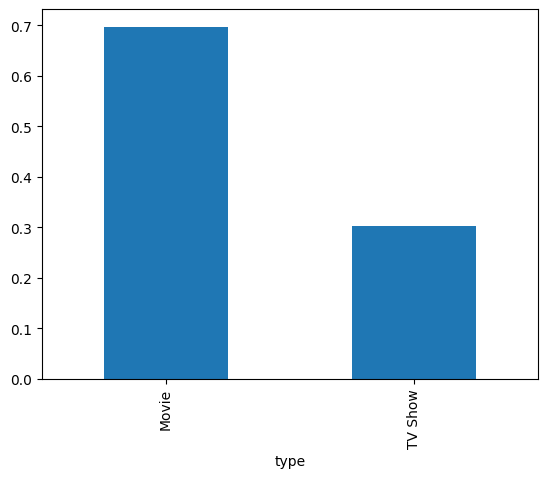

In [ ]:
df['type'].value_counts(normalize = True).plot(kind = 'bar')

3. The number of Movies vs. TV Shows added to Netflix changed over the years

In [ ]:
df.groupby(['year_added', 'type']).size().unstack(fill_value = 0)


type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,5
2015,56,26
2016,251,176


<Axes: xlabel='year_added'>

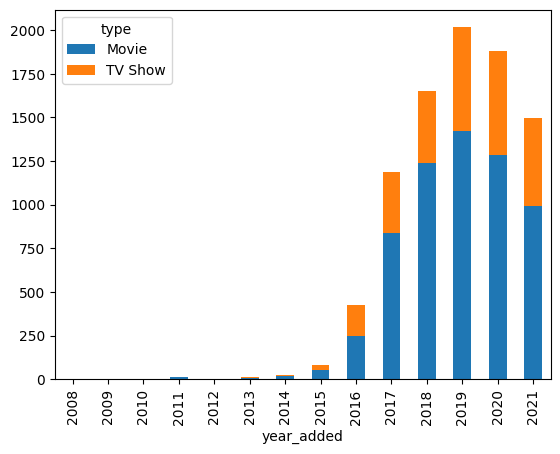

In [ ]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True)

4. How many unique directors are in the dataset?

In [ ]:
df['director'].nunique()

5584

5. Which directors have the most content?

In [ ]:
df['director'].value_counts().sort_values(ascending = False)[1:]

,count
director,
Rajiv Chilaka,23
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
Na Hyeon,1
John Papola,1
"John Mikulak, Joshua Brown",1


6. What are the most common content durations?

In [ ]:
df['duration_values'].value_counts().sort_values(ascending = False)

,count
duration_values,
1.0,1793
2.0,421
3.0,199
90.0,152
97.0,146
...,...
228.0,1
18.0,1
205.0,1


7. What are the most common content durations for Movies and TV Shows separately?

In [ ]:
df.groupby('type')['duration_values'].value_counts()

type     duration_values
Movie    90.0               152
         93.0               146
         94.0               146
         97.0               146
         91.0               144
                           ... 
TV Show  12.0                 2
         13.0                 2
         15.0                 2
         11.0                 1
         17.0                 1
Name: count, Length: 220, dtype: int64

8. Number of movies and TV shows created each year :

In [ ]:
yearly_counts = df['year_added'].value_counts().sort_index(ascending = False)
yearly_counts

,count
year_added,
2021,1498
2020,1879
2019,2016
2018,1649
2017,1187
2016,427
2015,82
2014,24
2013,11


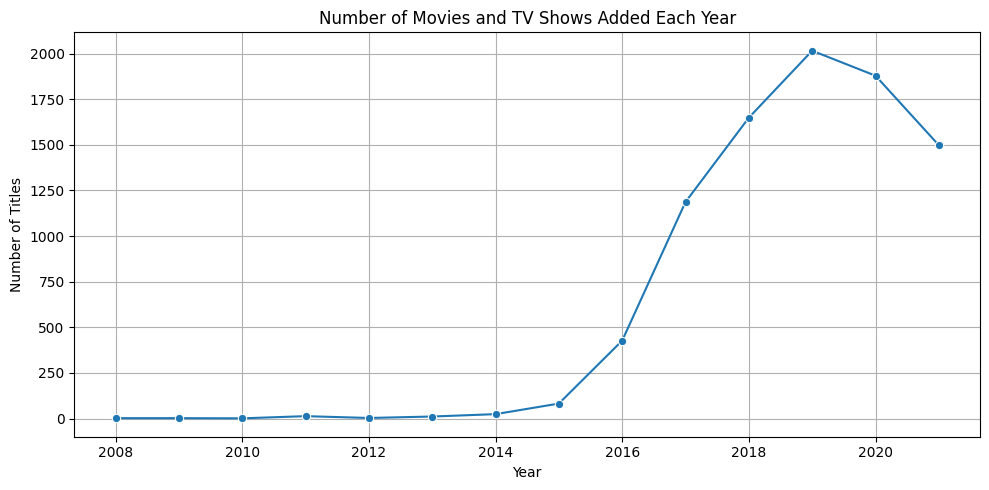

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Movies and TV Shows Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_movies_duration = df[df['type'] == 'Movie'][['type' , 'duration_values' , 'duration_unites']]
df_movies_duration

,type,duration_values,duration_unites
0,Movie,90.0,min
6,Movie,91.0,min
7,Movie,125.0,min
9,Movie,104.0,min
12,Movie,127.0,min
...,...,...,...
8801,Movie,96.0,min
8802,Movie,158.0,min
8804,Movie,88.0,min
8805,Movie,88.0,min


9. Average show duration (for movies only) :

In [ ]:
average_movies_duration = df_movies_duration['duration_values'].mean()
print(f'Average movies duration is : {average_movies_duration.round()} min')

Average movies duration is : 100.0 min


In [ ]:
df_TV_Show_duration = df[df['type'] == 'TV Show'][['type' , 'duration_values' , 'duration_unites']]
df_TV_Show_duration

,type,duration_values,duration_unites
1,TV Show,2.0,Seasons
2,TV Show,1.0,Season
3,TV Show,1.0,Season
4,TV Show,2.0,Seasons
5,TV Show,1.0,Season
...,...,...,...
8795,TV Show,2.0,Seasons
8796,TV Show,2.0,Seasons
8797,TV Show,3.0,Seasons
8800,TV Show,1.0,Season


10. Average show duration (for TV Show only) :

In [ ]:
average_TV_Show_duration = df_TV_Show_duration['duration_values'].mean()
print(f'Average movies duration is : {average_TV_Show_duration.round()} Seasons')

Average movies duration is : 2.0 Seasons


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min,2021
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,[],[],2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,[],[],2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min,2020


Explore cast column from main dataframe in subset dataframe contain type and cast column :

In [ ]:
df_cast = df[[ 'type' , 'cast' ]].explode('cast')

In [ ]:
df_cast.isna().sum()

,0
type,0
cast,825


In [ ]:
df_cast.dropna(subset='cast' , inplace=True)

In [ ]:
df_cast.isna().sum()

,0
type,0
cast,0


In [ ]:
df_cast['cast'] = df_cast['cast'].str.strip()

11. Number of actors who have appeared in 8,000.00 movies and TV Show :

In [ ]:
df_cast['cast'].nunique()

36403

12. Number of works in which each actor participated :

In [ ]:
df_cast['cast'].value_counts().sort_values(ascending = False)

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
...,...
Ahmet Talay,1
Neha Joshi,1
Tejashree Pradhan,1


13. Number of movies and TV shows each actor has appeared in :

In [ ]:
df_cast.groupby(['cast' , 'type']).size().unstack(fill_value=0)

type,Movie,TV Show
cast,,
"""Riley"" Lakdhar Dridi",1,0
'Najite Dede,1,1
2 Chainz,0,1
2Mex,1,0
4Minute,1,0
...,...,...
Şevket Çoruh,1,0
Şinasi Yurtsever,3,0
Şükran Ovalı,1,0


Explore listed_in (geners of movie or TV Show) column from main dataframe in subset dataframe :

In [ ]:
df_listed_in = df[['type' , 'title' , 'listed_in']].explode('listed_in')

In [ ]:
df_listed_in

,type,title,listed_in
0,Movie,Dick Johnson Is Dead,Documentaries
1,TV Show,Blood & Water,International TV Shows
1,TV Show,Blood & Water,TV Dramas
1,TV Show,Blood & Water,TV Mysteries
2,TV Show,Ganglands,Crime TV Shows
...,...,...,...
8805,Movie,Zoom,Children & Family Movies
8805,Movie,Zoom,Comedies
8806,Movie,Zubaan,Dramas
8806,Movie,Zubaan,International Movies


In [ ]:
df_listed_in.isna().sum()

,0
type,0
title,0
listed_in,0


14. Number of movies and TV Show in each gener in the  8000 movies or tv shows:

In [ ]:
df_listed_in['listed_in'].value_counts()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1350
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


extract movie type in subset_df :

In [ ]:
movies_type = df_listed_in[df_listed_in['type'] == 'Movie']
movies_type

,type,title,listed_in
0,Movie,Dick Johnson Is Dead,Documentaries
6,Movie,My Little Pony: A New Generation,Children & Family Movies
7,Movie,Sankofa,Dramas
7,Movie,Sankofa,Independent Movies
7,Movie,Sankofa,International Movies
...,...,...,...
8805,Movie,Zoom,Children & Family Movies
8805,Movie,Zoom,Comedies
8806,Movie,Zubaan,Dramas
8806,Movie,Zubaan,International Movies


15. Number of movies in each gener :

In [ ]:
movies_type['listed_in'].value_counts()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


extract TV Show type in subset_df :

In [ ]:
TV_Shows_type = df_listed_in[df_listed_in['type'] == 'TV Show']
TV_Shows_type

,type,title,listed_in
1,TV Show,Blood & Water,International TV Shows
1,TV Show,Blood & Water,TV Dramas
1,TV Show,Blood & Water,TV Mysteries
2,TV Show,Ganglands,Crime TV Shows
2,TV Show,Ganglands,International TV Shows
...,...,...,...
8800,TV Show,Zindagi Gulzar Hai,Romantic TV Shows
8800,TV Show,Zindagi Gulzar Hai,TV Dramas
8803,TV Show,Zombie Dumb,Kids' TV
8803,TV Show,Zombie Dumb,Korean TV Shows


16. Number of Tv Show in each gener :

In [ ]:
TV_Shows_type['listed_in'].value_counts()

,count
listed_in,
International TV Shows,1350
TV Dramas,762
TV Comedies,574
Crime TV Shows,469
Kids' TV,449
Docuseries,394
Romantic TV Shows,370
Reality TV,255
British TV Shows,252


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min,2021
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,[],[],2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,[],[],2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min,2020


In [ ]:
df_clean = df.explode('country')
df_clean['country'] = df_clean['country'].str.strip()

In [ ]:
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min,2021
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,[],NaN,2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,[],NaN,2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min,2020


In [ ]:
df_clean.dropna(subset = 'country' , inplace= True)

In [ ]:
df_clean.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
listed_in,0


17. The Number of each type of content according to the country :

In [ ]:
country_type = df_clean.groupby(['country', 'type']).size().unstack().fillna(0).astype(int)[1:].sort_values(['Movie' , 'TV Show'] , ascending = [False , False])
country_type

type,Movie,TV Show
country,,
United States,2748,932
India,962,84
United Kingdom,532,271
Canada,319,126
France,303,90
...,...,...
Azerbaijan,0,1
Belarus,0,1
Cuba,0,1


In [ ]:
country_type['Movie'].sort_values(ascending = False)

,Movie
country,
United States,2748
India,962
United Kingdom,532
Canada,319
France,303
...,...
Azerbaijan,0
Belarus,0
Cuba,0


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min,2021
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1.0,Season,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,[],[],2021-09-24,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2.0,Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,[],[],2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min,2020


18. Is there a relationship between the type of classification (Rating) and the type of work (movie/series)?

In [ ]:
rating_type_ct  = pd.crosstab(df['rating'] ,df['type'])
rating_type_ct

type,Movie,TV Show
rating,,
G,41,0
NC-17,3,0
NR,75,4
PG,287,0
PG-13,490,0
R,797,2
TV-14,1427,730
TV-G,126,94
TV-MA,2064,1145


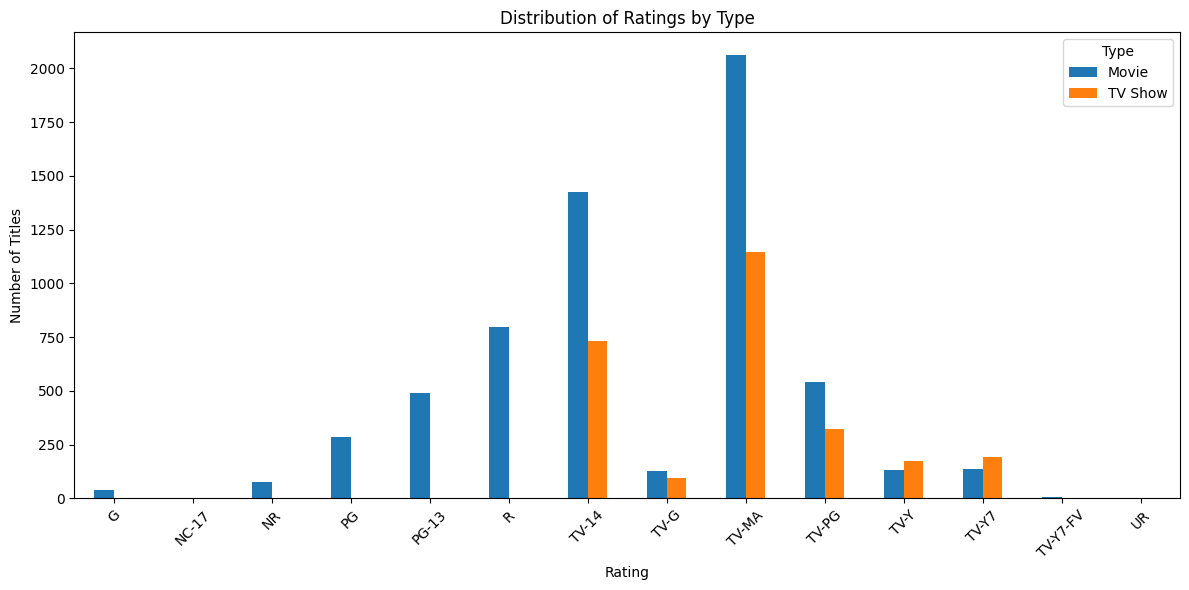

In [ ]:

rating_type_ct.plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Ratings by Type")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()


19. Which countries produce more content specifically for children?

In [ ]:
kids_ratings = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG']
df_kids = df[df['rating'].isin(kids_ratings)]
df_kids

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[],2021-09-24,2021,PG,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,91.0,min,2021
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","[Maisie Benson, Paul Killam, Kerry Gudjohnsen,...",[],2021-09-21,2021,TV-Y,[Children & Family Movies],From arcade games to sled days and hiccup cure...,61.0,min,2021
34,s35,TV Show,Tayo and Little Wizards,Unknown,"[Dami Lee, Jason Lee, Bommie Catherine Han, Je...",[],2021-09-17,2020,TV-Y7,[Kids' TV],Tayo speeds into an adventure when his friends...,1.0,Season,2021
37,s38,TV Show,Angry Birds,Clay Kaytis,"[Antti Pääkkönen, Heljä Heikkinen, Lynne Guagl...",[Finland],2021-09-16,2018,TV-Y7,"[Kids' TV, TV Comedies]","Birds Red, Chuck and their feathered friends h...",1.0,Season,2021
39,s40,TV Show,Chhota Bheem,Rajiv Chilaka,"[Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Ji...",[India],2021-09-16,2021,TV-Y7,[Kids' TV],"A brave, energetic little boy with superhuman ...",3.0,Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"[Dennis Quaid, Rene Russo, Sean Faris, Katija ...",[United States],2019-11-20,2005,PG,"[Children & Family Movies, Comedies]",When a father of eight and a mother of 10 prep...,88.0,min,2019
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"[Mike Liscio, Emily Bauer, Billy Bob Thompson,...","[Japan, Canada]",2018-05-01,2015,TV-Y7,"[Anime Series, Kids' TV]",Now that he's discovered the Pendulum Summonin...,2.0,Seasons,2018
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...","[United States, France, South Korea, Indonesia]",2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018
8803,s8804,TV Show,Zombie Dumb,Unknown,[],[],2019-07-01,2018,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2.0,Seasons,2019


In [ ]:
df_kids = df_kids[df_kids['country'].apply(lambda x: x != [] and x is not None)]
df_kids

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
37,s38,TV Show,Angry Birds,Clay Kaytis,"[Antti Pääkkönen, Heljä Heikkinen, Lynne Guagl...",[Finland],2021-09-16,2018,TV-Y7,"[Kids' TV, TV Comedies]","Birds Red, Chuck and their feathered friends h...",1.0,Season,2021
39,s40,TV Show,Chhota Bheem,Rajiv Chilaka,"[Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Ji...",[India],2021-09-16,2021,TV-Y7,[Kids' TV],"A brave, energetic little boy with superhuman ...",3.0,Seasons,2021
40,s41,TV Show,He-Man and the Masters of the Universe,Robert McCallum,"[Yuri Lowenthal, Kimberly Brooks, Antony Del R...",[United States],2021-09-16,2021,TV-Y7,"[Kids' TV, TV Sci-Fi & Fantasy]",Mighty teen Adam and his heroic squad of misfi...,1.0,Season,2021
41,s42,Movie,Jaws,Steven Spielberg,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",[United States],2021-09-16,1975,PG,"[Action & Adventure, Classic Movies, Dramas]",When an insatiable great white shark terrorize...,124.0,min,2021
42,s43,Movie,Jaws 2,Jeannot Szwarc,"[Roy Scheider, Lorraine Gary, Murray Hamilton,...",[United States],2021-09-16,1978,PG,"[Dramas, Horror Movies, Thrillers]",Four years after the last deadly shark attacks...,116.0,min,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,s8787,Movie,You Can Tutu,James Brown,"[Lily O'Regan, Jeannettsy Enriquez Borges, Joe...",[United Kingdom],2017-12-31,2017,TV-G,[Children & Family Movies],A gifted young ballet dancer struggles to find...,87.0,min,2017
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"[Dennis Quaid, Rene Russo, Sean Faris, Katija ...",[United States],2019-11-20,2005,PG,"[Children & Family Movies, Comedies]",When a father of eight and a mother of 10 prep...,88.0,min,2019
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"[Mike Liscio, Emily Bauer, Billy Bob Thompson,...","[Japan, Canada]",2018-05-01,2015,TV-Y7,"[Anime Series, Kids' TV]",Now that he's discovered the Pendulum Summonin...,2.0,Seasons,2018
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...","[United States, France, South Korea, Indonesia]",2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018


In [ ]:
df_kids = df_kids.explode('country')
df_kids['country'] = df_kids['country'].str.strip()

In [ ]:
df_kids

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
37,s38,TV Show,Angry Birds,Clay Kaytis,"[Antti Pääkkönen, Heljä Heikkinen, Lynne Guagl...",Finland,2021-09-16,2018,TV-Y7,"[Kids' TV, TV Comedies]","Birds Red, Chuck and their feathered friends h...",1.0,Season,2021
39,s40,TV Show,Chhota Bheem,Rajiv Chilaka,"[Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Ji...",India,2021-09-16,2021,TV-Y7,[Kids' TV],"A brave, energetic little boy with superhuman ...",3.0,Seasons,2021
40,s41,TV Show,He-Man and the Masters of the Universe,Robert McCallum,"[Yuri Lowenthal, Kimberly Brooks, Antony Del R...",United States,2021-09-16,2021,TV-Y7,"[Kids' TV, TV Sci-Fi & Fantasy]",Mighty teen Adam and his heroic squad of misfi...,1.0,Season,2021
41,s42,Movie,Jaws,Steven Spielberg,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",United States,2021-09-16,1975,PG,"[Action & Adventure, Classic Movies, Dramas]",When an insatiable great white shark terrorize...,124.0,min,2021
42,s43,Movie,Jaws 2,Jeannot Szwarc,"[Roy Scheider, Lorraine Gary, Murray Hamilton,...",United States,2021-09-16,1978,PG,"[Dramas, Horror Movies, Thrillers]",Four years after the last deadly shark attacks...,116.0,min,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...",United States,2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...",France,2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...",South Korea,2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018
8797,s8798,TV Show,Zak Storm,Unknown,"[Michael Johnston, Jessica Gee-George, Christi...",Indonesia,2018-09-13,2016,TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3.0,Seasons,2018


In [ ]:
kids_by_country = df_kids['country'].value_counts().head(10)
kids_by_country


,count
country,
United States,645
Canada,132
United Kingdom,110
France,71
Japan,49
India,40
Australia,39
Germany,27
South Korea,27


In [ ]:
df_movie = df[df['type'] == 'Movie']
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_values,duration_unites,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],[United States],2021-09-25,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",90.0,min,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[],2021-09-24,2021,PG,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,91.0,min,2021
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s...",125.0,min,2021
9,s10,Movie,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[United States],2021-09-24,2021,PG-13,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,104.0,min,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,"[Dramas, International Movies]",After most of her family is murdered in a terr...,127.0,min,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...","[United Arab Emirates, Jordan]",2016-03-09,2015,TV-MA,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...,96.0,min,2016
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",158.0,min,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,88.0,min,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",88.0,min,2020


20. What are the most popular movies duration ?

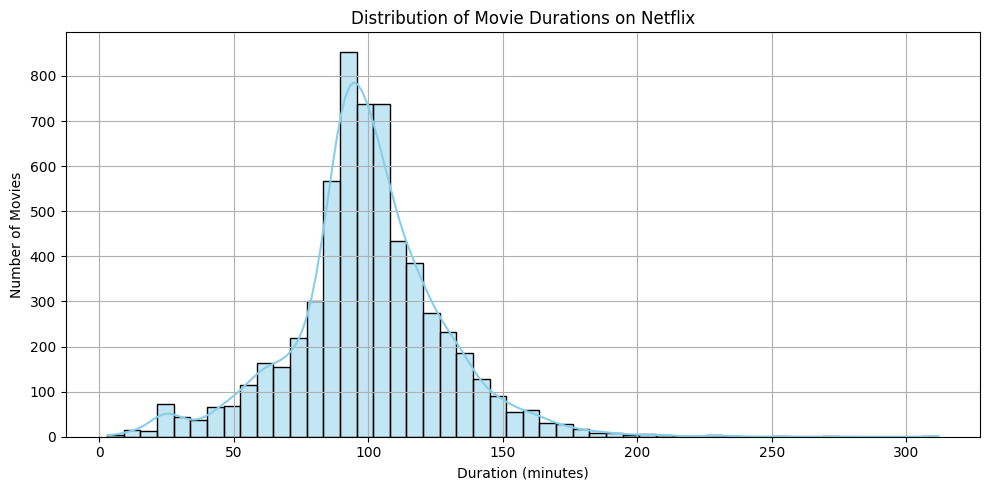

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_movie['duration_values'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()

relase dealy column :

In [ ]:
df['release_delay'] = df['year_added'] - df['release_year']
df['release_delay']

,release_delay
0,1
1,0
2,0
3,0
4,0
...,...
8802,12
8803,1
8804,10
8805,14


21. What is the average delay between the year of relase and the year of addition?

In [ ]:
average_delay = df['release_delay'].mean()
print(average_delay.round())

5.0


22. Is there a relationship between the year of relase and the year of addition? (e.g. through a scatter plot)

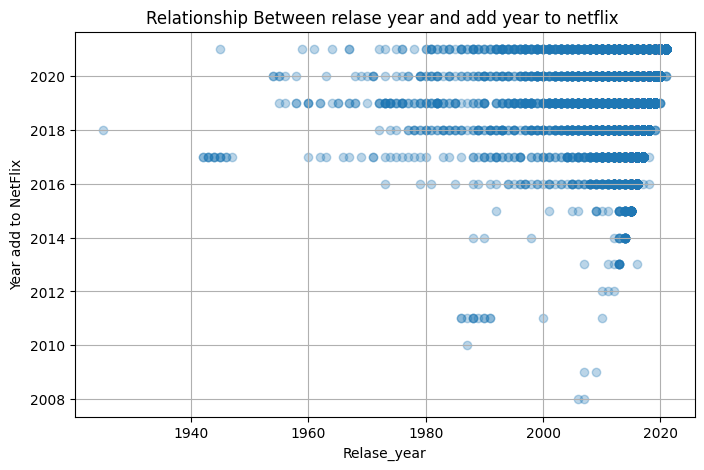

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['release_year'], df['year_added'], alpha=0.3)
plt.xlabel('Relase_year')
plt.ylabel("Year add to NetFlix")
plt.title("Relationship Between relase year and add year to netflix ")
plt.grid(True)
plt.show()